In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import math

#the function SIR(y,t) defines the differential equation
def SIR(y, t):
    S, I, R = y

    beta = 2*10**-5
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [2]:
#t is the time grid for the solution, this allows us model the variables across a time interval
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

#these equalities define the initial conditions and put them into an array y0
S0 = 10**4 - 3 #the intial number of susceptible people
I0 = 3 #the intial number of infected people
R0 = 0 #the initial number of recovered people
y0 = np.array([S0, I0, R0])

In [3]:
#the ODE solver odeint solves the differential equation defined by SIR with the intitial conditions from y0 across the time grid t
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

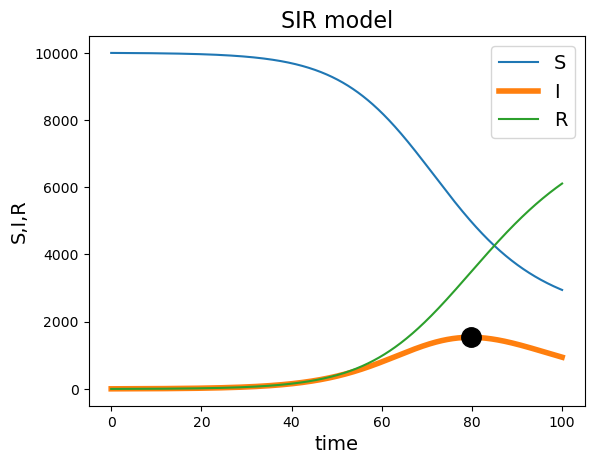

1535


In [4]:
# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)

#we can then define the maximum value of infected (maximumI) and locate it to see the time at which it occured(time_of_maximumI)
#we then mark this on the figure with a black circle
maximumI = np.max(I)
i= np.where(I == maximumI)
time_of_maximumI=t[i]
plt.plot(time_of_maximumI, maximumI, marker = 'o', color = 'k', markersize = 14)
plt.show()        
print(math.floor(maximumI))

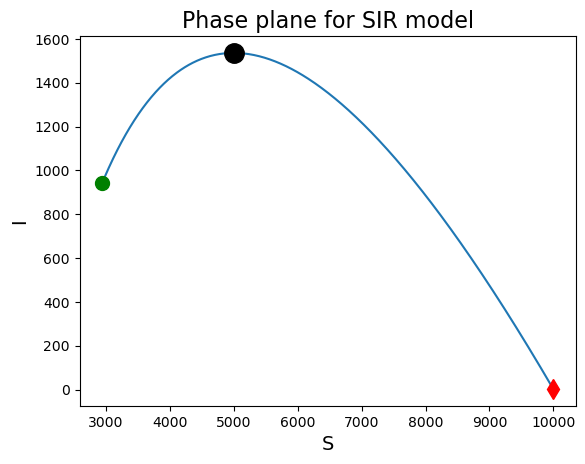

the figure compares the infected number against the susceptible number, with time starting at the red diamond and ending at the green circle


In [5]:
# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)

#we can then find the number ot susceptible people at the time when the number of infected people is at its maximum (time_of_maximumI)
#we can then plot this point with a black circle on the figure
S_at_maximumI=S[i]
plt.plot(S_at_maximumI, maximumI, marker = 'o', color = 'k', markersize = 14)
plt.show()
print("the figure compares the infected number against the susceptible number, with time starting at the red diamond and ending at the green circle")

I will now look at the effect of beta on the maximum value of I

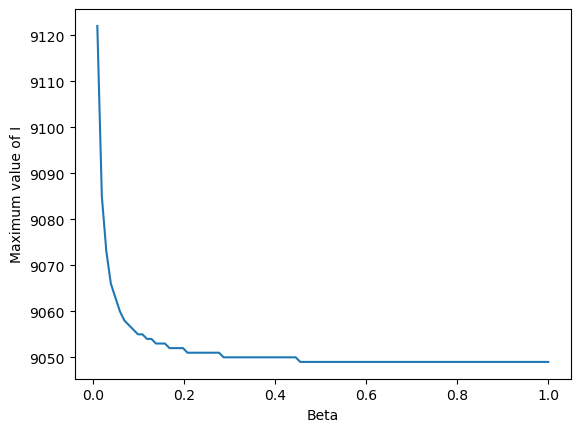

when beta is equal to zero the maximum I is 3 as no-one else is infected, I chose to emit this value as it scuppered the scale on the graph


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import math

mu = 0.1
    #we redefine the differential equation
def SIR(y, t):
    S, I, R= y
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot
#we define the function Imax which returns the maximum number of infected people for a given value of beta
def Imax(beta):
    tf = 100
    Nsteps = 100
    t = np.linspace(0, tf, Nsteps+1)

    S0 = 10**4 - 3
    I0 = 3
    R0 = 0
    y0 = np.array([S0, I0, R0])
    
    y_sol = odeint(SIR, y0, t)
    I2 = y_sol[:,1]
    maximum=np.max(I2)
    return maximum
#we then define a range of values of beta representing the infectivity
betas = np.linspace(1/100,1,101)
ar = []
#and use it to append the array(ar) with the maximum values of the number of infected over the range of beta values
#we floor these values to make it more realistic as you obviously cannot have a non-integer number of infected
for beta in betas:
    ar = ar + [math.floor(Imax(beta))]    
#print(ar)
#we can then plot the maximum number of infected against the range of beta values (representing the different infectivity values)
plt.plot(betas, ar)
plt.xlabel("Beta")
plt.ylabel("Maximum value of I")
plt.show()

print("when beta is equal to zero the maximum I is 3 as no-one else is infected, I chose to emit this value as it scuppered the scale on the graph")



    
    
